#####  Divya Swaminathan  ,   April 8th 2020.

Analysis of the Pima India dataset.

Central Queation is - With what accuracy can I predict if
a person will have diabetes or not. 


Data available -  https://www.kaggle.com/uciml/pima-indians-diabetes-database and/or UCI machine learning repository


***********

In this worksheet I have performed: \
(a) a basic exploratory data analysis. \
(b) imputed some feature values. \
(c) performed a simple logistic regression on the original dataset. 

***********

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import sklearn.metrics as metrics

***********
#### Section 1: Exploratory Data Analysis
***********

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Coulumns names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Column types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Dimension of the data set
df.shape

(768, 9)

In [7]:
# Descipton of the data set
df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# 'Are there any null values?'
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Note for both skin thickness and Insulin atleast 25% of values  are zero  and there are no NA's or null values. 

In [9]:
# Column Outcome is the response variable. 
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17362890>]],
      dtype=object)

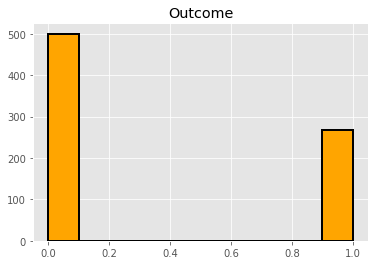

In [10]:
# Response variable, Outcome, is imbalanced
df.hist(['Outcome'], facecolor = 'orange', edgecolor = 'k', linewidth = 2)



In [11]:
# Count the # of zeros per feature(column)
df.isin([0]).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

 Pregnancies and outcome being zero is fine but there are high numbers of 'insulin' and 'skin thickness' equal to zero along with few readings of 'BP', 'BMI' and 'Glucose'. I choose to impute these values based on mean value of the feature by class. 

In [12]:
 x =df.Outcome[1:5]

In [13]:
df_impute = df.copy()

In [14]:
fill_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# Mask zeros to NAN's
df_impute.iloc[:,1:6] = df_impute.iloc[:,1:6].mask(df_impute.iloc[:,1:6] == 0)
df_impute.head()
# Subset the data set based on class
df_impute0 = df_impute[df_impute.Outcome == 0]
df_impute1 = df_impute[df_impute.Outcome == 1]
#

In [15]:
# Fill NANs , in columns of choice, using class means
df_impute0.loc[:,fill_columns]=df_impute0.loc[:,fill_columns].fillna(df_impute0.loc[:,fill_columns].mean())

/Users/divyaswaminathan/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
df_impute1.loc[:,fill_columns]= df_impute1.loc[:,fill_columns].fillna(df_impute1.loc[:,fill_columns].mean())

In [17]:
# Concat the 2 subsets and shuffle.
df_impute = pd.concat([df_impute0,df_impute1],axis = 0)

from sklearn.utils import shuffle
df_impute = shuffle(df_impute)

print('Original data set')
df.groupby('Outcome').mean().transpose() 


Original data set


Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [18]:
print('After imputing')
df_impute.groupby('Outcome').mean().transpose()

After imputing


Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,110.643863,142.319549
BloodPressure,70.877339,75.321429
SkinThickness,27.235457,33.000000
Insulin,130.287879,206.846154
BMI,30.859674,35.406767
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


##### Notice the difference in values now .

#### Some Exploratory Plots

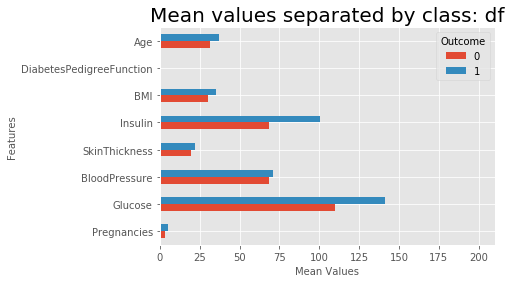

In [19]:

table1 = df.groupby('Outcome').mean().transpose()
table1_impute = df_impute.groupby('Outcome').mean().transpose()

table1.plot(kind = 'barh', xlim = [0,210], ylim = [0,10])
plt.xlabel('Mean Values', size = 10)
plt.ylabel('Features', size = 10)
plt.title('Mean values separated by class: df', size = 20)
plt.show()

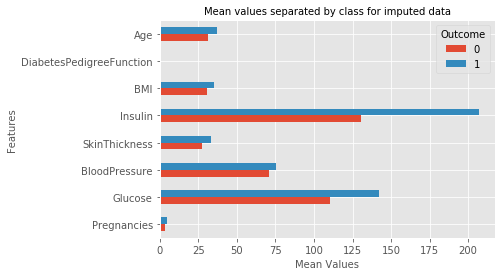

In [20]:
table1_impute.plot(kind = 'barh', ylim = [0, 10])
plt.xlabel('Mean Values', size = 10)
plt.ylabel('Features', size= 10)
plt.title('Mean values separated by class for imputed data', size = 10)
plt.show()

##### Plot correlation matrix

In [21]:
corr = abs(df_impute.corr())
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.129867,0.208935,0.0941718,0.0935457,0.0241267,0.0335227,0.544341,0.221898
Glucose,0.129867,1,0.224356,0.23504,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1,0.203453,0.0999962,0.286518,0.00226411,0.324439,0.175087
SkinThickness,0.0941718,0.23504,0.203453,1,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.0935457,0.497789,0.0999962,0.212573,1,0.231533,0.121716,0.165149,0.410918
BMI,0.0241267,0.235253,0.286518,0.565443,0.231533,1,0.15253,0.027578,0.315271
DiabetesPedigreeFunction,0.0335227,0.138125,0.00226411,0.102426,0.121716,0.15253,1,0.0335613,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.0335613,1,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1


In [22]:
corr_matrix = df_impute.corr().abs()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,0.002264,0.324439,0.175087
SkinThickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
BMI,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,0.033523,0.138125,0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


In [23]:
# Print correlations in descending order
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol[0:15])

SkinThickness  BMI              0.565443
Pregnancies    Age              0.544341
Glucose        Insulin          0.497789
               Outcome          0.495954
Insulin        Outcome          0.410918
BloodPressure  Age              0.324439
BMI            Outcome          0.315271
SkinThickness  Outcome          0.308094
BloodPressure  BMI              0.286518
Glucose        Age              0.268566
Age            Outcome          0.238356
Glucose        BMI              0.235253
               SkinThickness    0.235040
Insulin        BMI              0.231533
Glucose        BloodPressure    0.224356
dtype: float64


##### Features are not highly correlated . 
Maximum correlation is 0.56 b/w Skin Thickness and BMI

On this data a few things to be noticed

a) Data is imbalanced. I will work on upsampling or downsampling the data and refining the models in a future version of the code.

b) As this is a classification problem I will first try to use Logistic Regression to see what results are obtained. Also I am going to apply it on the original dataset df, before I venture to apply it on the imputed data frame. 

c) What can you say about feature importances here ?

*********
#### Section 2 - Apply Logistic Regression on 'df'
*********


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split

kf = KFold(n_splits=3, random_state = 2, shuffle=True)

#LR = LogisticRegression(solver='lbfgs')
LR = LogisticRegression(solver = 'liblinear')

In [25]:
# Feature vector X is the first 8 columns of df
X = df[df.columns[0:8]]
# Target / Response vector is df.Outcome
y = df.Outcome

In [26]:
# Call Logistic Regression. 

y_predict = np.empty((0,1), float)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
print(len(X_train), len(X_test))
logreg = LR.fit(X_train, y_train)
y_predict = np.append(y_predict,logreg.predict(X_test))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

576 192
Training set score: 0.783
Test set score: 0.750


Text(0.5, 1.0, 'Histogram of residuals : Logistic Regression')

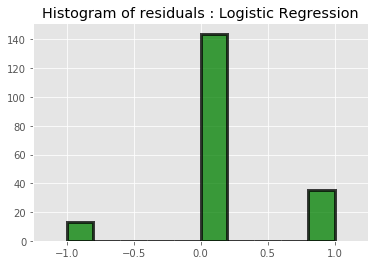

In [27]:
residuals = y_test-y_predict

# As we are classifying whether the Outcome is 0 or 1, the residuals range from -1, +1 
# hence a histogram will clearly show  correct predictions as 0's

plt.hist(residuals, facecolor = 'green',edgecolor= 'black',linewidth=3,alpha = 0.75)
plt.xlim(-1.25,1.25)
plt.title('Histogram of residuals : Logistic Regression')

In [28]:
# For feature importance I look at .coef_
logreg.coef_.T

array([[ 0.13662246],
       [ 0.02858541],
       [-0.01827692],
       [-0.00214846],
       [-0.00051546],
       [ 0.05293945],
       [ 0.50396212],
       [ 0.00548986]])

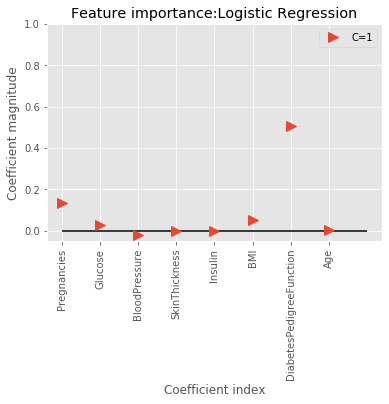

In [29]:
# Plot feature importances
plt.plot(logreg.coef_.T, '>',markersize = 10, label="C=1")
plt.xticks(range(df.shape[1]-1), df.columns[0:8], rotation=90)
plt.hlines(0, 0, df.shape[1]-1)
plt.ylim(-0.05, 1.0)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title('Feature importance:Logistic Regression')
plt.legend()

In [30]:
# VIEW metrics of this prediction
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_predict)
print('The calculated confusion matrix for the data set using Logistic Refressoin is')
print(confusion)



The calculated confusion matrix for the data set using Logistic Refressoin is
[[115  13]
 [ 35  29]]


Note: First row is for Outcome = 0 \
      Second row is for Outcome = 1 \
About 50%  of class 1 was accurately predicted !!, i.e recall = TP/(TP+FN) at 50% is low\
Check  interpretation using classification report


In [31]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       128
           1       0.69      0.45      0.55        64

    accuracy                           0.75       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.75      0.73       192



Text(0.5, 1.0, 'ROC curve: Logistic Regression')

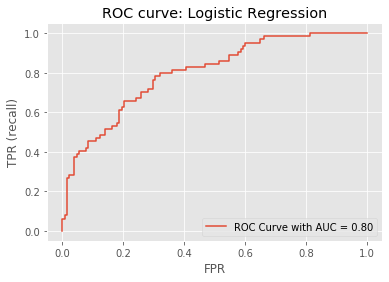

In [32]:
 from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))
AUC = metrics.auc(fpr,tpr)

plt.plot(fpr, tpr, label="ROC Curve with AUC = %0.2f" % AUC)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)
plt.title('ROC curve: Logistic Regression')


#### Results

a) Using logistic regression on this data set (without imputing values) gives us a training/test score of about 75%. 

b) Diabetes pedegree function is  the most important feature for prediction purposes. 

c) And recall is low at ~ 50%. I am missing people with diabetes and have to do better. 

d) Approach going ahead - First I intent to repeat analysis with imputed data and then use other classification models (kfold CV with logistic regression, knn, random forrest & SVM) to see which performs better that the rest. Another thing I must take care of is class imbalances. 

